In [1]:
'''
Fluids PS3 Exercise 3
@author: Patrick Horlaville
March 10th, 2022
'''

'\nFluids PS3 Exercise 3\n@author: Patrick Horlaville\nMarch 10th, 2022\n'

Diffusion Equation : 
$$
\frac{\partial f}{\partial t} = D \frac{\partial^2 f}{\partial x^2}
$$

Equation for velocity of lava flow going down inclined plane (derived in class) :
$$
u(y) = \frac{-gsin(\alpha)y^{2}}{2\nu} + \frac{gsin(\alpha)H}{\nu}
$$

for inclined plane of angle $\alpha$ with lava flow of height $H$ and viscosity $\nu$


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
nu = 2500 # Eve's estimate for ballasic lava flow viscosity [cm^2/s]
g = 980 # Gravitational acceleration [cm^2/s]
alpha = 0.35 # 20 degree inclined plane [rad]
H = 5 # height of lava [cm]

In [5]:
def u(x): # equation for u as shown earlier
    speed = -(g*np.sin(alpha))/(2*nu)*(x**2) + ((g*np.sin(alpha))/nu)*H*x
    return speed

In [6]:
y_loc = np.linspace(0, H, 100)
u_val = u(y_loc)

<IPython.core.display.Javascript object>


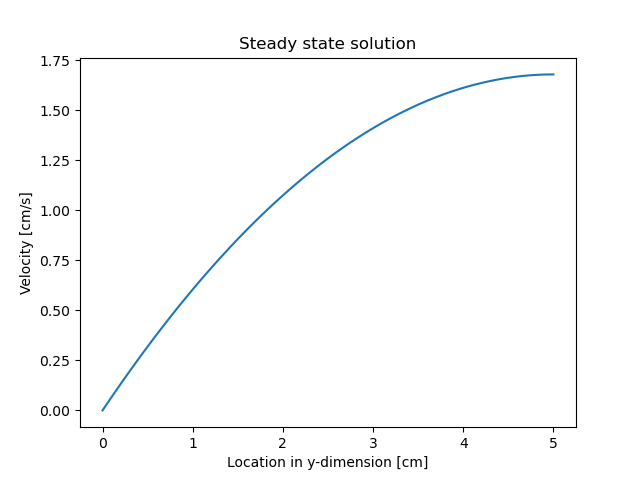

Text(0.5, 1.0, 'Steady state solution')

In [7]:
plt.plot(y_loc, u_val)
plt.xlabel("Location in y-dimension [cm]")
plt.ylabel("Velocity [cm/s]")
plt.title("Steady state solution")

In [8]:
dy = 0.05 # spatial step
dt = 0.0001 # time step
beta = nu*dt/(dy**2) # beta factor

y_arr = np.arange(0, 5.05, dy)
new_u = np.copy(y_arr)

<IPython.core.display.Javascript object>


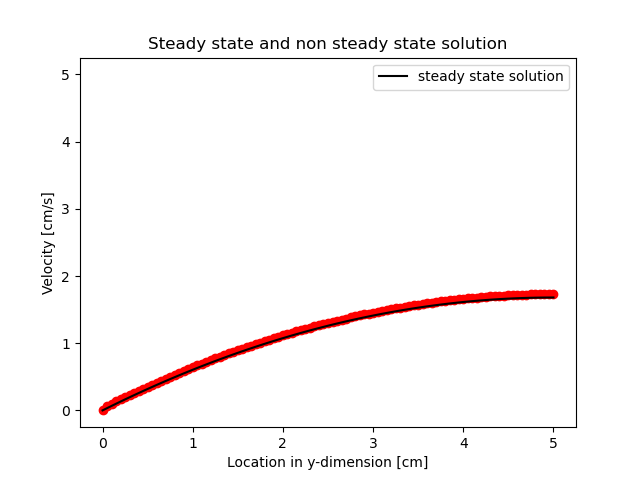

In [9]:
plt.ion()
fig, axes = plt.subplots(1,1)
plt1, = axes.plot(y_arr, new_u, 'ro')
fig.canvas.draw()

t_i = 0
time_tot = 0.05

# Using Eve's code snippets on solving the diffusion equation, along with required boundary conditions
A1 = np.eye(len(y_arr)) * (1.0 + 2.0 * beta) + np.eye(len(y_arr), k=1) * -beta + np.eye(len(y_arr), k=-1) * -beta
A1[0][0] = 1.0
A1[0][1] = 0
   
A1[-1][-1] = 1.0 + beta

plt.plot(y_loc, u_val, 'k', label = 'steady state solution')
plt.xlabel('Location in y-dimension [cm]')
plt.ylabel("Velocity [cm/s]")
plt.title('Steady state and non steady state solution')
plt.legend()

while t_i <= time_tot:
    if t_i != 0:
        new_u = np.linalg.solve(A1, new_u)
        new_u += (g*np.sin(alpha))*dt
        new_u[0] = 0
        
    t_i += dt
    plt1.set_ydata(new_u)
    fig.canvas.draw()
    plt.pause(0.001)
